# 1. Introduction

In [5]:
!wget https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/beans_dataset.tar.gz

--2023-07-26 18:03:10--  https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/beans_dataset.tar.gz
Resolving dsserver-prod-resources-1.s3.amazonaws.com (dsserver-prod-resources-1.s3.amazonaws.com)... 3.5.29.67, 54.231.136.225, 16.182.70.249, ...
Connecting to dsserver-prod-resources-1.s3.amazonaws.com (dsserver-prod-resources-1.s3.amazonaws.com)|3.5.29.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 179790562 (171M) [application/x-gzip]
Saving to: ‘beans_dataset.tar.gz.1’

beans_dataset.tar.g 100%[===================>] 171.46M  43.3MB/s    in 3.9s    

2023-07-26 18:03:15 (43.6 MB/s) - ‘beans_dataset.tar.gz.1’ saved [179790562/179790562]



In [6]:
import tarfile

def extract_tar_gz(file_path, output_path):
    with tarfile.open(file_path, 'r:gz') as tar:
        tar.extractall(path=output_path)

extract_tar_gz('/content/beans_dataset.tar.gz', '.')

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
import matplotlib.pyplot as plt

train_set = tf.keras.utils.image_dataset_from_directory(
    directory='beans/train/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(227, 227))

validation_set = tf.keras.utils.image_dataset_from_directory(
    directory='beans/validation/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(227, 227))

test_set = tf.keras.utils.image_dataset_from_directory(
    directory='beans/test/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(227, 227))

train_imgs = train_set.map(lambda imgs, labels: imgs)
normalization_layer = layers.Normalization(axis=-1)
normalization_layer.adapt(train_imgs)

train_set_normalized = train_set.map(lambda imgs, labels: (normalization_layer(imgs), labels))
validation_set_normalized = validation_set.map(lambda imgs, labels: (normalization_layer(imgs), labels))
test_set_normalized = test_set.map(lambda imgs, labels: (normalization_layer(imgs), labels))

Found 1034 files belonging to 3 classes.
Found 133 files belonging to 3 classes.
Found 128 files belonging to 3 classes.


In [8]:
model = models.Sequential()
model.add(layers.Conv2D(filters=64, kernel_size=5, strides=2, activation='relu', input_shape=(227, 227, 3)))
model.add(layers.MaxPooling2D(pool_size=3, strides=2))

model.add(layers.Conv2D(filters=64, kernel_size=5, strides=2, padding="same", activation='relu'))
model.add(layers.MaxPooling2D(pool_size=3, strides=1))

model.add(layers.Conv2D(filters=128, kernel_size=5, strides=2, padding="same", activation='relu'))
model.add(layers.MaxPooling2D(pool_size=3, strides=1))
model.add(layers.Flatten())

model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(3))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      4864      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        102464    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 128)       204928    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 11, 11, 128)     

# 2. Training the Model

Epoch 1/25
33/33 [==============================] - 18s 161ms/step - loss: 1.6265 - accuracy: 0.4333 - val_loss: 1.0318 - val_accuracy: 0.4887
Epoch 2/25
33/33 [==============================] - 5s 119ms/step - loss: 0.8997 - accuracy: 0.5841 - val_loss: 0.7749 - val_accuracy: 0.6316
Epoch 3/25
33/33 [==============================] - 5s 143ms/step - loss: 0.7454 - accuracy: 0.6721 - val_loss: 1.0401 - val_accuracy: 0.5414
Epoch 4/25
33/33 [==============================] - 5s 118ms/step - loss: 0.7858 - accuracy: 0.6576 - val_loss: 0.8357 - val_accuracy: 0.6541
Epoch 5/25
33/33 [==============================] - 5s 117ms/step - loss: 0.7093 - accuracy: 0.6944 - val_loss: 0.7453 - val_accuracy: 0.6767
Epoch 6/25
33/33 [==============================] - 6s 149ms/step - loss: 0.6083 - accuracy: 0.7427 - val_loss: 0.6679 - val_accuracy: 0.6767
Epoch 7/25
33/33 [==============================] - 5s 120ms/step - loss: 0.5671 - accuracy: 0.7418 - val_loss: 0.5187 - val_accuracy: 0.7895
Epoch

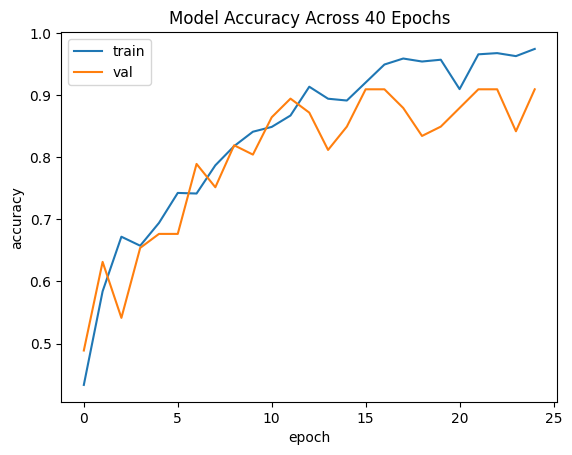

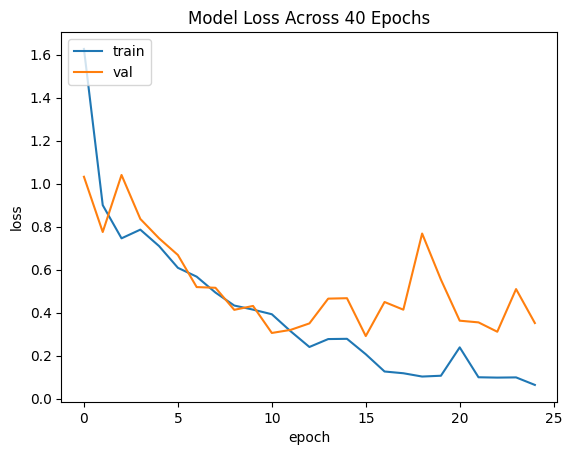

4/4 [==============================] - 1s 29ms/step - loss: 0.5774 - accuracy: 0.8594
Test set accuracy: 0.859375


In [9]:
opt = tf.keras.optimizers.Adam()
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

history = model.fit(train_set_normalized, epochs=25, validation_data=validation_set_normalized)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Across 40 Epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Across 40 Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

test_loss, test_acc = model.evaluate(test_set_normalized)
print(f"Test set accuracy: {test_acc}")

# 3. Early Stopping

In [10]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')

model = models.Sequential()
model.add(layers.Conv2D(filters=64, kernel_size=5, strides=2, activation='relu', input_shape=(227, 227, 3)))
model.add(layers.MaxPooling2D(pool_size=3, strides=2))

model.add(layers.Conv2D(filters=64, kernel_size=5, strides=2, padding="same", activation='relu'))
model.add(layers.MaxPooling2D(pool_size=3, strides=1))

model.add(layers.Conv2D(filters=128, kernel_size=5, strides=2, padding="same", activation='relu'))
model.add(layers.MaxPooling2D(pool_size=3, strides=1))
model.add(layers.Flatten())

model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(3))

opt = tf.keras.optimizers.Adam()
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

history = model.fit(train_set_normalized, epochs=25, validation_data=validation_set_normalized, callbacks=[callback])

Epoch 1/25
33/33 [==============================] - 8s 118ms/step - loss: 1.6642 - accuracy: 0.4778 - val_loss: 0.8319 - val_accuracy: 0.5789
Epoch 2/25
33/33 [==============================] - 5s 118ms/step - loss: 0.7794 - accuracy: 0.6586 - val_loss: 0.7726 - val_accuracy: 0.6541
Epoch 3/25
33/33 [==============================] - 5s 119ms/step - loss: 0.6841 - accuracy: 0.7041 - val_loss: 0.7345 - val_accuracy: 0.7068
Epoch 4/25
33/33 [==============================] - 4s 114ms/step - loss: 0.6556 - accuracy: 0.7205 - val_loss: 0.7189 - val_accuracy: 0.6692
Epoch 5/25
33/33 [==============================] - 6s 153ms/step - loss: 0.6089 - accuracy: 0.7515 - val_loss: 0.5725 - val_accuracy: 0.7820
Epoch 6/25
33/33 [==============================] - 5s 116ms/step - loss: 0.5955 - accuracy: 0.7427 - val_loss: 0.5862 - val_accuracy: 0.7744
Epoch 7/25
33/33 [==============================] - 6s 149ms/step - loss: 0.4910 - accuracy: 0.7940 - val_loss: 0.4774 - val_accuracy: 0.7895
Epoch 

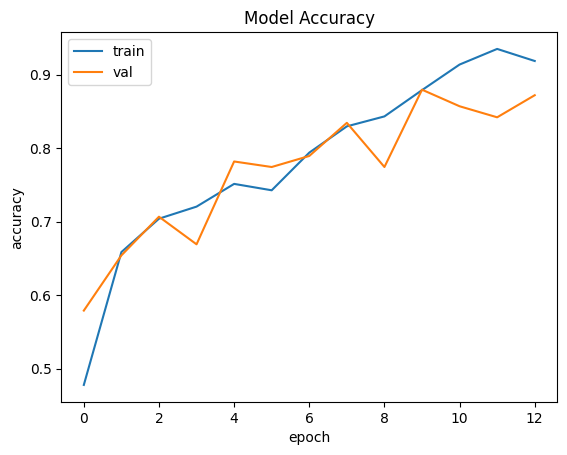

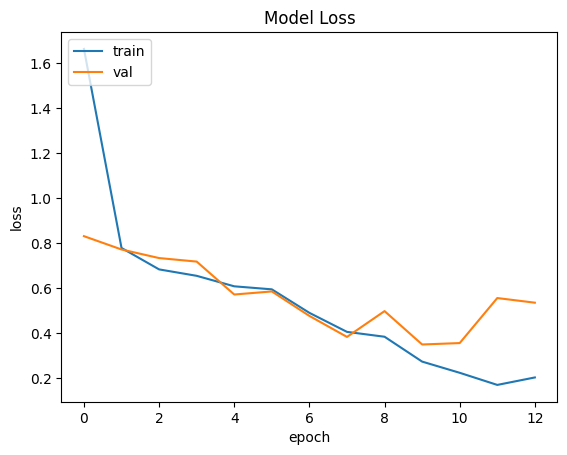

4/4 [==============================] - 0s 30ms/step - loss: 0.5621 - accuracy: 0.8516
Test set accuracy: 0.8515625


In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

test_loss, test_acc = model.evaluate(test_set_normalized)
print(f"Test set accuracy: {test_acc}")

# 4. Dropout

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(filters=64, kernel_size=5, strides=2, activation='relu', input_shape=(227, 227, 3)))
model.add(layers.MaxPooling2D(pool_size=3, strides=2))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(filters=64, kernel_size=5, strides=2, padding="same", activation='relu'))
model.add(layers.MaxPooling2D(pool_size=3, strides=1))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(filters=128, kernel_size=5, strides=2, padding="same", activation='relu'))
model.add(layers.MaxPooling2D(pool_size=3, strides=1))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())

model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(3))

opt = tf.keras.optimizers.Adam()
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

history = model.fit(train_set_normalized, epochs=25, validation_data=validation_set_normalized)

Epoch 1/25
33/33 [==============================] - 7s 120ms/step - loss: 2.1379 - accuracy: 0.3424 - val_loss: 1.0987 - val_accuracy: 0.3308
Epoch 2/25
33/33 [==============================] - 6s 125ms/step - loss: 1.1002 - accuracy: 0.3453 - val_loss: 1.0982 - val_accuracy: 0.3383
Epoch 3/25
33/33 [==============================] - 5s 117ms/step - loss: 1.0993 - accuracy: 0.3346 - val_loss: 1.0986 - val_accuracy: 0.3383
Epoch 4/25
33/33 [==============================] - 6s 152ms/step - loss: 1.0986 - accuracy: 0.3453 - val_loss: 1.0986 - val_accuracy: 0.3383
Epoch 5/25
33/33 [==============================] - 5s 120ms/step - loss: 1.0992 - accuracy: 0.3337 - val_loss: 1.0988 - val_accuracy: 0.3308
Epoch 6/25
33/33 [==============================] - 5s 138ms/step - loss: 1.0994 - accuracy: 0.3259 - val_loss: 1.0986 - val_accuracy: 0.3383
Epoch 7/25
33/33 [==============================] - 5s 121ms/step - loss: 1.0995 - accuracy: 0.3075 - val_loss: 1.0986 - val_accuracy: 0.3383
Epoch 

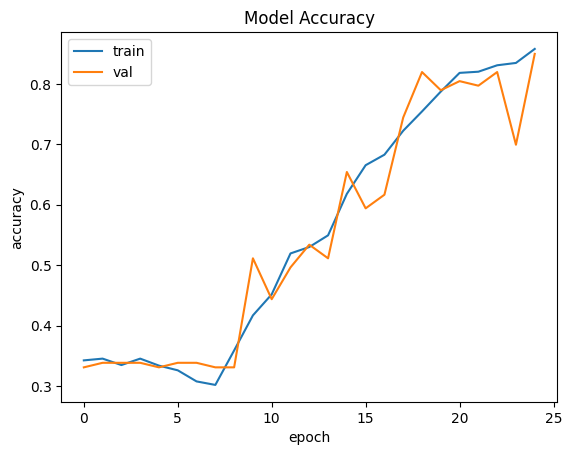

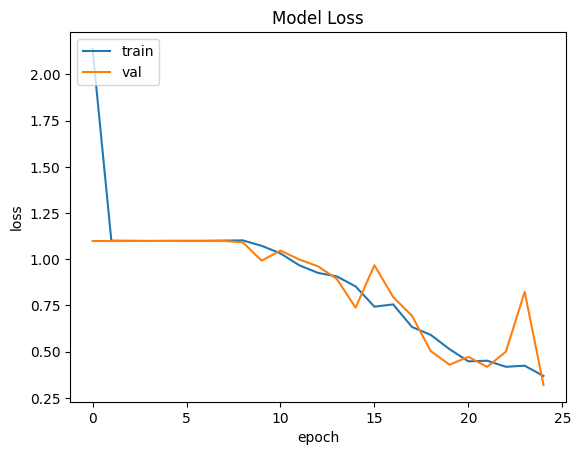

4/4 [==============================] - 1s 32ms/step - loss: 0.3993 - accuracy: 0.8359
Test set accuracy: 0.8359375


In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

test_loss, test_acc = model.evaluate(test_set_normalized)
print(f"Test set accuracy: {test_acc}")

# 5. Batch Normalization I

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(filters=64, kernel_size=5, strides=2, activation='relu',
                        input_shape=(227, 227, 3)))
model.add(layers.MaxPooling2D(pool_size=3, strides=2))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(filters=64, kernel_size=5, strides=2, padding="same", activation='relu'))
model.add(layers.MaxPooling2D(pool_size=3, strides=1))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(filters=128, kernel_size=5, strides=2, padding="same", activation='relu'))
model.add(layers.MaxPooling2D(pool_size=3, strides=1))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())

model.add(layers.Dense(2048, activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Dense(3))

opt = tf.keras.optimizers.Adam()
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

history = model.fit(train_set_normalized, epochs=25, validation_data=validation_set_normalized)

Epoch 1/25
33/33 [==============================] - 9s 121ms/step - loss: 1.7928 - accuracy: 0.6083 - val_loss: 6.9119 - val_accuracy: 0.5639
Epoch 2/25
33/33 [==============================] - 5s 118ms/step - loss: 0.6974 - accuracy: 0.7389 - val_loss: 2.5821 - val_accuracy: 0.5564
Epoch 3/25
33/33 [==============================] - 5s 134ms/step - loss: 0.5153 - accuracy: 0.8017 - val_loss: 0.9614 - val_accuracy: 0.6992
Epoch 4/25
33/33 [==============================] - 5s 122ms/step - loss: 0.3994 - accuracy: 0.8404 - val_loss: 0.7406 - val_accuracy: 0.7368
Epoch 5/25
33/33 [==============================] - 6s 158ms/step - loss: 0.3578 - accuracy: 0.8424 - val_loss: 1.5778 - val_accuracy: 0.5338
Epoch 6/25
33/33 [==============================] - 5s 121ms/step - loss: 0.3483 - accuracy: 0.8588 - val_loss: 0.8766 - val_accuracy: 0.7143
Epoch 7/25
33/33 [==============================] - 6s 153ms/step - loss: 0.3887 - accuracy: 0.8598 - val_loss: 0.6579 - val_accuracy: 0.7820
Epoch 

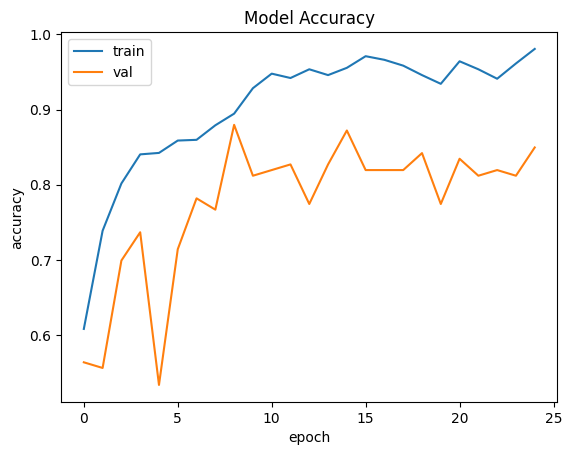

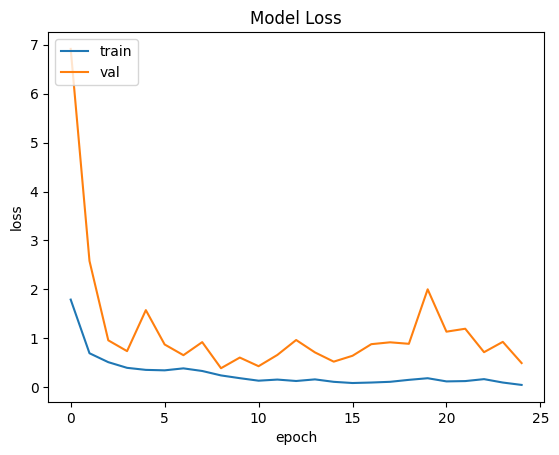

4/4 [==============================] - 1s 35ms/step - loss: 0.5484 - accuracy: 0.9062
Test set accuracy: 0.90625


In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

test_loss, test_acc = model.evaluate(test_set_normalized)
print(f"Test set accuracy: {test_acc}")

# 6. Batch Normalization II

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(filters=64, kernel_size=5, strides=2, activation='relu', input_shape=(227, 227, 3)))
model.add(layers.MaxPooling2D(pool_size=3, strides=2))
model.add(layers.BatchNormalization(momentum=0.9))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(filters=64, kernel_size=5, strides=2, padding="same", activation='relu'))
model.add(layers.MaxPooling2D(pool_size=3, strides=1))
model.add(layers.BatchNormalization(momentum=0.9))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(filters=128, kernel_size=5, strides=2, padding="same", activation='relu'))
model.add(layers.MaxPooling2D(pool_size=3, strides=1))
model.add(layers.BatchNormalization(momentum=0.9))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())

model.add(layers.Dense(2048, activation='relu'))
model.add(layers.BatchNormalization(momentum=0.9))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization(momentum=0.9))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(3))

opt = tf.keras.optimizers.Adam()
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

history = model.fit(train_set_normalized, epochs=25, validation_data=validation_set_normalized)

Epoch 1/25
33/33 [==============================] - 10s 124ms/step - loss: 1.6126 - accuracy: 0.5812 - val_loss: 1.0389 - val_accuracy: 0.6767
Epoch 2/25
33/33 [==============================] - 6s 158ms/step - loss: 1.0388 - accuracy: 0.6741 - val_loss: 0.7412 - val_accuracy: 0.7143
Epoch 3/25
33/33 [==============================] - 5s 122ms/step - loss: 0.8197 - accuracy: 0.7282 - val_loss: 0.6855 - val_accuracy: 0.7519
Epoch 4/25
33/33 [==============================] - 5s 134ms/step - loss: 0.7163 - accuracy: 0.7456 - val_loss: 0.7169 - val_accuracy: 0.7594
Epoch 5/25
33/33 [==============================] - 5s 119ms/step - loss: 0.6852 - accuracy: 0.7756 - val_loss: 0.5531 - val_accuracy: 0.7970
Epoch 6/25
33/33 [==============================] - 6s 144ms/step - loss: 0.5383 - accuracy: 0.8104 - val_loss: 0.6437 - val_accuracy: 0.7594
Epoch 7/25
33/33 [==============================] - 5s 118ms/step - loss: 0.5592 - accuracy: 0.8017 - val_loss: 0.4335 - val_accuracy: 0.8496
Epoch

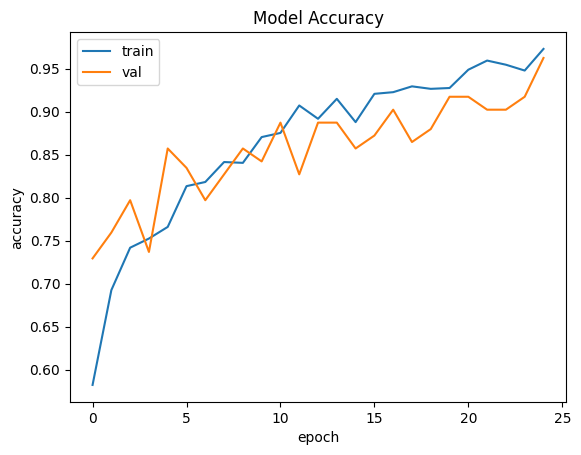

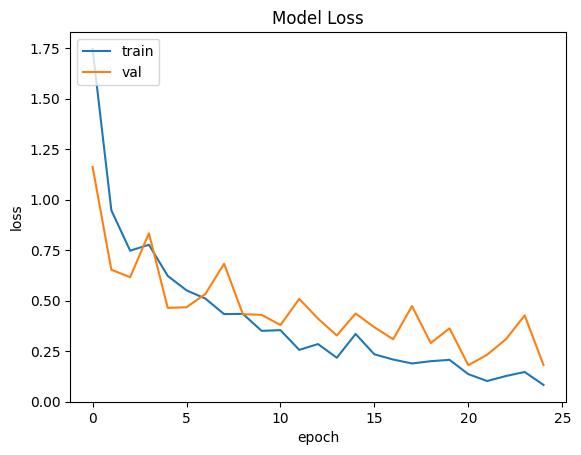

4/4 [==============================] - 0s 25ms/step - loss: 0.3539 - accuracy: 0.9141
Test set accuracy: 0.9140625


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

test_loss, test_acc = model.evaluate(test_set_normalized)
print(f"Test set accuracy: {test_acc}")

# 7. Data Augmentation

In [17]:
model = models.Sequential()
model.add(layers.RandomFlip("horizontal_and_vertical"))
model.add(layers.RandomRotation(0.5))

model.add(layers.Conv2D(filters=64, kernel_size=5, strides=2, activation='relu', input_shape=(227, 227, 3)))
model.add(layers.MaxPooling2D(pool_size=3, strides=2))
model.add(layers.BatchNormalization(momentum=0.9))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(filters=64, kernel_size=5, strides=2, padding="same", activation='relu'))
model.add(layers.MaxPooling2D(pool_size=3, strides=1))
model.add(layers.BatchNormalization(momentum=0.9))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(filters=128, kernel_size=5, strides=2, padding="same", activation='relu'))
model.add(layers.MaxPooling2D(pool_size=3, strides=1))
model.add(layers.BatchNormalization(momentum=0.9))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())

model.add(layers.Dense(2048, activation='relu'))
model.add(layers.BatchNormalization(momentum=0.9))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization(momentum=0.9))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(3))

opt = tf.keras.optimizers.Adam()
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

history = model.fit(train_set_normalized, epochs=25, validation_data=validation_set_normalized)

Epoch 1/25
33/33 [==============================] - 10s 151ms/step - loss: 1.6532 - accuracy: 0.5658 - val_loss: 1.1641 - val_accuracy: 0.6917
Epoch 2/25
33/33 [==============================] - 5s 123ms/step - loss: 1.1639 - accuracy: 0.6306 - val_loss: 1.1842 - val_accuracy: 0.6391
Epoch 3/25
33/33 [==============================] - 6s 155ms/step - loss: 0.9611 - accuracy: 0.6818 - val_loss: 0.7349 - val_accuracy: 0.7218
Epoch 4/25
33/33 [==============================] - 5s 124ms/step - loss: 0.8762 - accuracy: 0.6779 - val_loss: 0.5615 - val_accuracy: 0.7444
Epoch 5/25
33/33 [==============================] - 6s 132ms/step - loss: 0.8172 - accuracy: 0.7002 - val_loss: 0.7038 - val_accuracy: 0.7519
Epoch 6/25
33/33 [==============================] - 5s 120ms/step - loss: 0.8052 - accuracy: 0.7012 - val_loss: 0.5287 - val_accuracy: 0.8195
Epoch 7/25
33/33 [==============================] - 6s 162ms/step - loss: 0.6558 - accuracy: 0.7660 - val_loss: 0.6031 - val_accuracy: 0.7594
Epoch

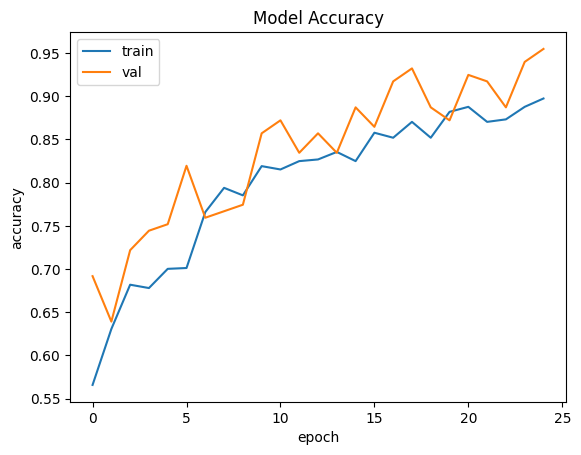

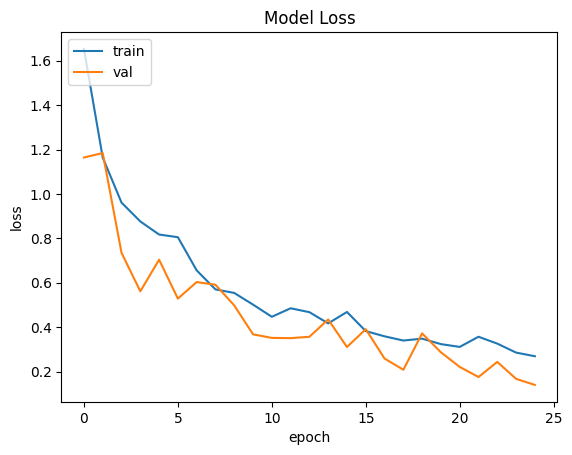

4/4 [==============================] - 1s 43ms/step - loss: 0.3279 - accuracy: 0.8906
Test set accuracy: 0.890625


In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

test_loss, test_acc = model.evaluate(test_set_normalized)
print(f"Test set accuracy: {test_acc}")